## Introduction

This project analyzes bike-sharing data from three major U.S. cities: **New York**, **Washington**, and **Chicago**.

The goal is to explore user behavior, focusing on:

1.  **Total travel time by user type and city.**
2.  **Gender distribution among users** in New York and Chicago.
3.  **Most common months for bike usage** in each city.

Insights from this analysis could help guide operational and marketing strategies for bike-sharing services.


In [62]:
#Load the necessary libraries

library(ggplot2)
library(dplyr)

nyc = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [7]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


## Question 1

#### What is the total travel time for users in different cities?

*"I'm going to tailor the data sets, to exclude any variable from User Type that is not customer or subscriber. This will provide valuable feedback about the travel times for these two specific consumers."*

In [9]:
# Filtering out "Dependents" user type to focus on primary user groups

ny_filtered <- nyc %>% filter(User.Type %in% c("Customer", "Subscriber"))
wash_filtered <- wash %>% filter(User.Type  %in% c("Customer", "Subscriber"))
chi_filtered <- chi %>% filter(User.Type  %in% c("Customer", "Subscriber"))

In [37]:
# Aggregate total trip duration by user type and city

ny_travel_time <- ny_filtered %>%
  group_by(User.Type) %>%
  summarise(Trip.Duration = sum(Trip.Duration, na.rm = TRUE)) %>%
  mutate(City = "New York")

wash_travel_time <- wash_filtered %>%
  group_by(User.Type) %>%
  summarise(Trip.Duration  = sum(Trip.Duration , na.rm = TRUE)) %>%
  mutate(City = "Washington")

chi_travel_time <- chi_filtered %>%
  group_by(User.Type) %>%
  summarise(Trip.Duration  = sum(Trip.Duration , na.rm = TRUE)) %>%
  mutate(City = "Chicago")

In [44]:
# Combine all aggregated city data into one data frame

city_totals <- bind_rows(ny_travel_time, wash_travel_time, chi_travel_time)

#show info
city_totals

User.Type,Trip.Duration,City
Customer,12189116,New York
Subscriber,37084015,New York
Customer,61777358,Washington
Subscriber,48106186,Washington
Customer,3369740,Chicago
Subscriber,4715041,Chicago


In [39]:
# Convert Trip Duration from seconds to hours and create a new column
city_totals <- city_totals %>%
  mutate(Trip_Duration_Hours = Trip.Duration / 3600)

# Format the Trip_Duration_Hours column to include commas and round to no decimal places
city_totals$Trip_Duration_Hours_Display <- format(round(city_totals$Trip_Duration_Hours, 0), big.mark = ",")


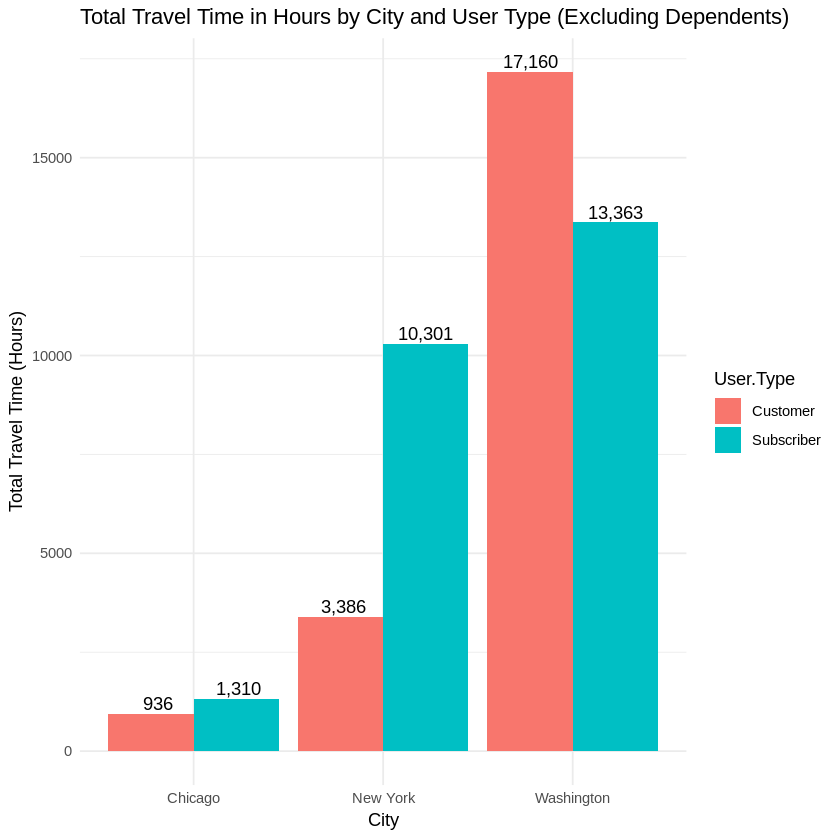

In [40]:
# Visualization: Showing the total travel time by user type and city

ggplot(city_totals, aes(x = City, y = Trip_Duration_Hours, fill = User.Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = Trip_Duration_Hours_Display), vjust = -0.3, position = position_dodge(width = 0.9)) +
  labs(title = "Total Travel Time in Hours by City and User Type (Excluding Dependents)",
       x = "City",
       y = "Total Travel Time (Hours)") + 
  theme_minimal()

#### Question 1 | Summary: 

**`Washington`** has the highest total travel time for both Customer and Subscriber user types, with Subscribers accumulating 13,363 hours and Customers slightly higher at 17,160 hours.

**`New York`** City ranks second in total travel time. Here, Subscribers contribute 10,301 hours, while Customers contribute 3,386 hours.

Chicago shows the lowest total travel time. Subscribers have 1,310 hours of travel time, and Customers have only 936 hours.

## Question 2

#### What are the counts of each gender (only available for NYC and Chicago)?

*"Since two of our data sets have unique values, we will do an analysis on genders in the NY(New York) & Chi(Chicago) data set."*

In [61]:
# Filter to only include rows where Gender is "Male" or "Female" for New York and Chicago, excluding any NA values or unexpected values.

# Count the number of each gender in the New York dataset
NY_Gender_Count <- nyc %>%
  filter(Gender %in% c("Male", "Female")) %>%  # Filter only Male and Female
  count(Gender) %>%
  mutate(City = "New York")

# Count the number of each gender in the Chicago dataset
chi_Gender_Count <- chi %>%
  filter(Gender %in% c("Male", "Female")) %>%  # Filter only Male and Female
  count(Gender) %>%
  mutate(City = "Chicago")

# Combine results for New York and Chicago
Gender_Count <- bind_rows(NY_Gender_Count, chi_Gender_Count)

# Format the `n` column with commas for readability
Gender_Count$n <- format(Gender_Count$n, big.mark = ",")

# Print the final table of gender counts by city
Gender_Count



Gender,n,City
Female,"12,159",New York
Male,"37,201",New York
Female,"1,723",Chicago
Male,"5,159",Chicago


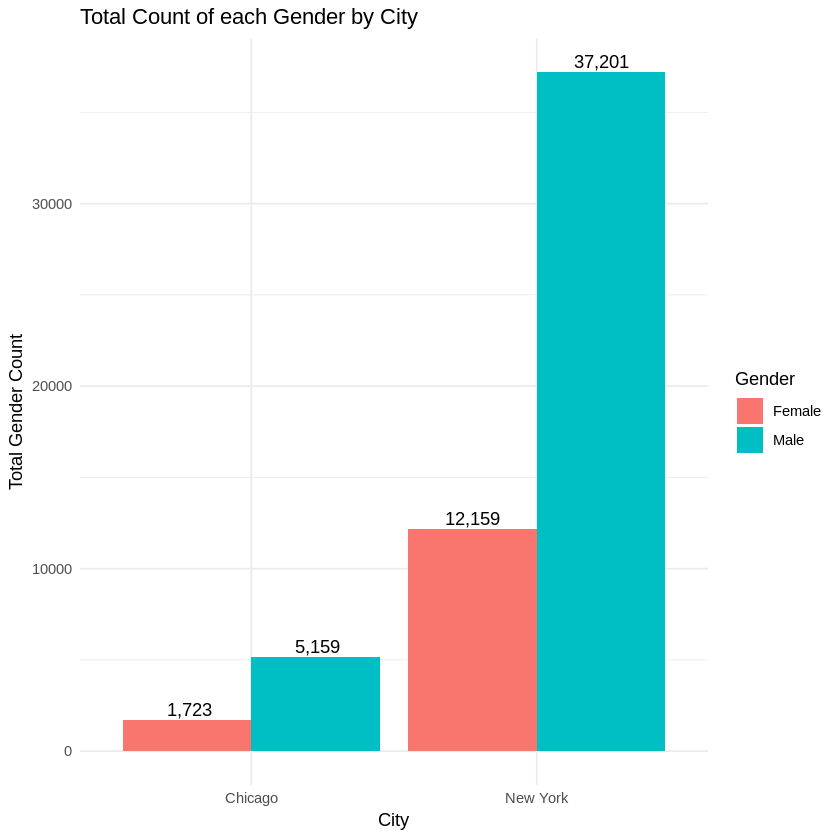

In [65]:
# Visualization: Bar plot of gender distribution in New York and Chicago

ggplot(Gender_Count, aes(x = City, y = n, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = n_display), vjust = -0.3, position = position_dodge(width = 0.9)) +
  labs(title = "Total Count of each Gender by City",
       x = "City",
       y = "Total Gender Count") +
  theme_minimal()

#### Question 2 | Summary: 


**`New York:`**

Male Users: The count for male users is significantly higher than that for female users, with 37,201 male users compared to 12,159 female users.
This substantial difference suggests that male users are more actively engaged in bike-sharing in New York.

**`Chicago:`**

Male Users: In Chicago, male users also outnumber female users, with 5,159 male users compared to 1,723 female users.
Although the total user count is lower in Chicago than in New York, the male-to-female ratio is consistent, indicating a similar trend in both cities.

### Question 3

**Your question 3 goes here.**

In [67]:
# Converts the 'Start Time' column from a character string to POSIXct date-time format for each city.
# This conversion allows us to extract specific components, like month, day, and year, for analysis.

nyc$Start.Time <- as.POSIXct(nyc$Start.Time, format = "%Y-%m-%d %H:%M:%S")
wash$Start.Time <- as.POSIXct(wash$Start.Time, format = "%Y-%m-%d %H:%M:%S")
chi$Start.Time <- as.POSIXct(chi$Start.Time, format = "%Y-%m-%d %H:%M:%S")

In [69]:
# Extracts the month, day, and year components from the 'Start Time' column for each dataset (New York, Washington, and Chicago).
# Each component is saved in a separate column ('Month', 'Day', 'Year') for further analysis.

nyc$Month <- format(nyc$Start.Time, '%B')
nyc$Day <- format(nyc$Start.Time, '%d')
nyc$Year <- format(nyc$Start.Time, '%Y')

wash$Month <- format(wash$Start.Time, '%B')
wash$Day <- format(wash$Start.Time, '%d')
wash$Year <- format(wash$Start.Time, '%Y')

chi$Month <- format(chi$Start.Time, '%B')
chi$Day <- format(chi$Start.Time, '%d')
chi$Year <- format(chi$Start.Time, '%Y')

In [71]:
# Counts the occurrences of each month in the 'Month' column for each city.
# The month with the highest count is selected as the most common month.
# Adds a 'city' column to label the results for each city.

ny_month_count <- nyc %>% 
  count(Month) %>% 
  top_n(1, n) %>%  # Selects the month with the highest count
  mutate(city = 'New York')

wash_month_count <- wash %>% 
  count(Month) %>% 
  top_n(1, n) %>% 
  mutate(city = 'Washington')

chi_month_count <- chi %>% 
  count(Month) %>% 
  top_n(1, n) %>% 
  mutate(city = 'Chicago')

In [72]:
# Combines the most common month data from each city into one data frame.
# Formats the count column ('n') to include commas for readability.
# Displays the final results showing the most common month for each city.

most_common_month <- bind_rows(ny_month_count, wash_month_count, chi_month_count)
most_common_month$n <- format(most_common_month$n, big.mark = ",")

most_common_month

Month,n,city
June,"14,000",New York
June,"20,335",Washington
June,"2,816",Chicago


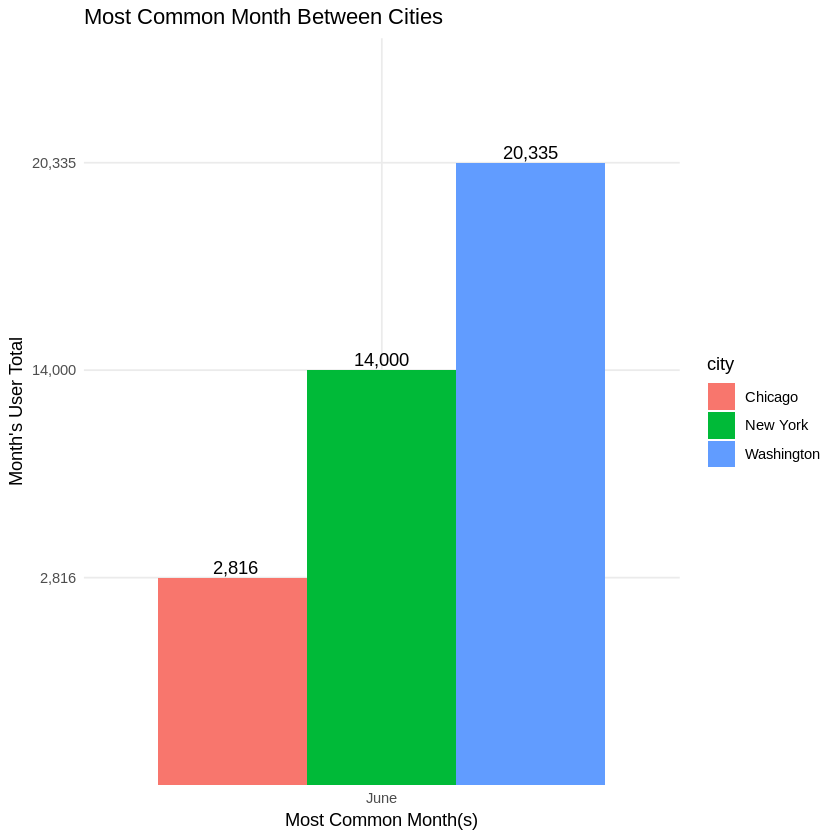

In [73]:
# Visualization: Most common month for bike usage in each city

ggplot(most_common_month, aes(x = `Month`,  y = `n`, fill = `city`)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = n), vjust = -0.3,  position = position_dodge(width = 0.9))  +
  labs(title = "Most Common Month Between Cities",
       x = "Most Common Month(s)",
       y = "Month's User Total") +
  theme_minimal()

#### Question 3 | Summary: 

**`Washington:`**

The most common month for bike usage is June, with the highest user count of 20,335.
This indicates that Washington experiences a peak in bike-sharing activity during the summer, likely due to favorable weather conditions and possibly increased tourism.
New York:

For **`New York`**, the month with the highest usage is also June, with a total user count of 14,000.
This trend aligns with Washington, suggesting that summer is a popular time for bike-sharing in urban areas on the East Coast.
Chicago:

In **`Chicago`**, the month with the highest bike-sharing usage is June as well, but with a lower user count of 2,816.
Although Chicago follows the same trend with June as the peak month, the total usage is considerably lower compared to New York and Washington, possibly due to differences in population density or bike-sharing adoption.

## Conclusion

In summary, this analysis provides valuable insights into user behavior in the bike-sharing datasets across three cities:

1.  **Subscribers are the dominant user type** in total travel time, especially in New York.
2.  **Gender analysis reveals a higher usage rate among male users** in New York and Chicago, suggesting opportunities for growth in female engagement.
3.  **Seasonal trends show peak usage in the summer months**. June is the most common month for bike usage across all three cities, highlighting a strong seasonal trend.

These insights highlight key user segments and seasonal trends that can guide operational decisions, resource allocation, and targeted marketing strategies for bike-sharing services.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [76]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')